## PESONALITY PREDICTOR


**Table of content :**

1. IMPOPRTING LIBRARIES AND LOADING DATA

2. DATA CLEANING & PREPROCESSING

3. EXPLORATORY DATA ANALYSIS (EDA)

4. FEATURE ENGINEERING

5. MODEL

6. GIVE INPUTS 

7. FIND THE OUTPUT

### IMPOPRTING LIBRARIES AND LOADING DATA


In [2]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, StandardScaler, PolynomialFeatures
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
import warnings
warnings.filterwarnings('ignore')

In [4]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("rakeshkapilavai/extrovert-vs-introvert-behavior-data")

print("Path to dataset files:", path)
data = pd.read_csv(path + "/personality_dataset.csv")
data.head()

Path to dataset files: /home/mutaician/.cache/kagglehub/datasets/rakeshkapilavai/extrovert-vs-introvert-behavior-data/versions/2


,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency,Personality
0,4.0,No,4.0,6.0,No,13.0,5.0,Extrovert
1,9.0,Yes,0.0,0.0,Yes,0.0,3.0,Introvert
2,9.0,Yes,1.0,2.0,Yes,5.0,2.0,Introvert
3,0.0,No,6.0,7.0,No,14.0,8.0,Extrovert
4,3.0,No,9.0,4.0,No,8.0,5.0,Extrovert


### DATA CLEANING AND PREPROCESSING

In this section, we prepare the raw data for analysis and modeling by addressing data quality issues. This includes handling missing values, encoding categorical variables, managing outliers, checking for duplicates, and splitting the data into training and test sets. Each step is explained to ensure clarity.

In [5]:
# Define columns
numeric_columns = ['Time_spent_Alone', 'Social_event_attendance', 'Going_outside', 
                  'Friends_circle_size', 'Post_frequency']
categorical_columns = ['Stage_fear', 'Drained_after_socializing']
target_column = 'Personality'

In [6]:
# Display basic information about the dataset to understand its structure and identify issues
print("Dataset Shape:", data.shape)
print("\nDataset Info:")
print(data.info())
print("\nMissing Values:")
print(data.isnull().sum())

Dataset Shape: (2900, 8)

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2900 entries, 0 to 2899
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Time_spent_Alone           2837 non-null   float64
 1   Stage_fear                 2827 non-null   object 
 2   Social_event_attendance    2838 non-null   float64
 3   Going_outside              2834 non-null   float64
 4   Drained_after_socializing  2848 non-null   object 
 5   Friends_circle_size        2823 non-null   float64
 6   Post_frequency             2835 non-null   float64
 7   Personality                2900 non-null   object 
dtypes: float64(5), object(3)
memory usage: 181.4+ KB
None

Missing Values:
Time_spent_Alone             63
Stage_fear                   73
Social_event_attendance      62
Going_outside                66
Drained_after_socializing    52
Friends_circle_size          77
Post_frequency            

In [7]:
# Step 1: Encode target variable
# Convert the categorical target 'Personality' (Extrovert/Introvert) to numerical values (1/0) for modeling
le = LabelEncoder()
data[target_column] = le.fit_transform(data[target_column])  # Extrovert=1, Introvert=0
print("Target variable encoded. Extrovert=1, Introvert=0")

# Step 2: Handle missing values
# Replace missing values in numeric columns with the median value of each column
numeric_imputer = SimpleImputer(strategy='median')
data[numeric_columns] = numeric_imputer.fit_transform(data[numeric_columns])
print("Missing values in numeric columns filled with median.")

# Replace missing values in categorical columns with the most frequent category
categorical_imputer = SimpleImputer(strategy='most_frequent')
data[categorical_columns] = categorical_imputer.fit_transform(data[categorical_columns])
print("Missing values in categorical columns filled with most frequent value.")

# Verify no missing values remain
print("\nMissing Values After Imputation:")
print(data.isnull().sum())

# Step 3: Check for duplicate rows
# Identify if there are any duplicate entries in the dataset
print("\nNumber of duplicate rows:", data.duplicated().sum())
# Remove duplicates if any exist
if data.duplicated().sum() > 0:
    data = data.drop_duplicates()
    print("Duplicates removed. New dataset shape:", data.shape)
else:
    print("No duplicates found.")

# Step 4: Encode categorical features
# Convert categorical variables (Stage_fear, Drained_after_socializing) into binary columns (0/1) using one-hot encoding
data = pd.get_dummies(data, columns=categorical_columns, drop_first=True)
print("Categorical variables encoded into binary columns.")

# Step 5: Cap outliers (less aggressive for extrovert-indicating features)
# Limit extreme values in numeric columns to reduce the impact of outliers on the model
for col in numeric_columns:
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    # Less aggressive upper bound for extrovert-related features to allow higher values
    upper_bound = Q3 + 2.5 * IQR if col in ['Social_event_attendance', 'Friends_circle_size', 'Post_frequency'] else Q3 + 1.5 * IQR
    data[col] = data[col].clip(lower=lower_bound, upper=upper_bound)
print("Outliers capped in numeric columns.")

# Step 6: Train-test split
# Split the dataset into training (80%) and testing (20%) sets for model evaluation
X = data.drop(columns=[target_column])
y = data[target_column]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)
print("Dataset split into training and test sets. Training shape:", X_train.shape, "Test shape:", X_test.shape)

Target variable encoded. Extrovert=1, Introvert=0
Missing values in numeric columns filled with median.
Missing values in categorical columns filled with most frequent value.

Missing Values After Imputation:
Time_spent_Alone             0
Stage_fear                   0
Social_event_attendance      0
Going_outside                0
Drained_after_socializing    0
Friends_circle_size          0
Post_frequency               0
Personality                  0
dtype: int64

Number of duplicate rows: 448
Duplicates removed. New dataset shape: (2452, 8)
Categorical variables encoded into binary columns.
Outliers capped in numeric columns.
Dataset split into training and test sets. Training shape: (1961, 7) Test shape: (491, 7)


### EXPLORATORY DATA ANALYSIS (EDA)

In this section, we use visualizations to explore the dataset and uncover patterns between features and the target variable (Personality: Extrovert vs. Introvert). The goal is to identify key differences between personality types and understand which factors might influence them. Each plot is designed to be clear and easy to interpret, with textual summaries to highlight key insights.

Insight 1: The dataset contains 1395 Introverts and 1057 Extroverts, showing the balance of personality types.
Insight 2: On average, Introverts spend 2.1 hours alone, while Extroverts spend 6.9 hours alone, indicating a clear difference.
Insight 3: Extroverts attend an average of 1.9 social events, significantly more than Introverts who attend 6.0 events.
Insight 4: Extroverts have an average friends circle size of 3.3, much larger than Introverts at 9.0.


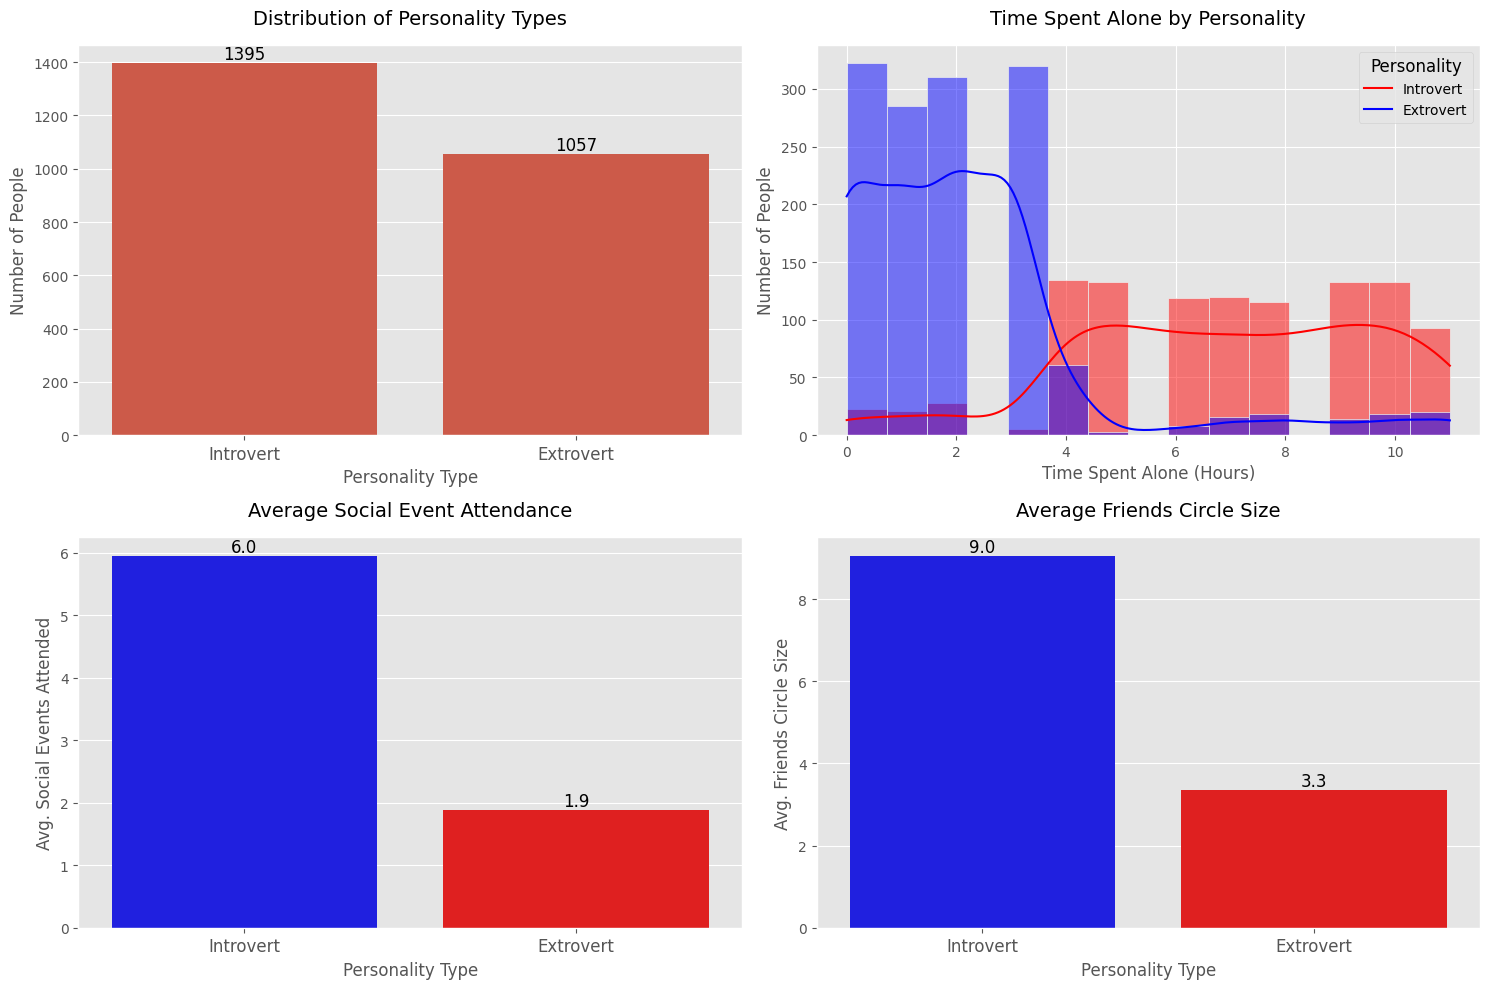

EDA completed. The visualizations and insights above highlight key differences between Introverts and Extroverts, focusing on time spent alone, social engagement, and friendship circles. These factors can guide feature selection for modeling.


In [10]:
# Import visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Set a widely compatible style for better visualizations
plt.style.use('ggplot')

# Create a figure with subplots for key visualizations
fig = plt.figure(figsize=(15, 10))

# 1. Distribution of Personality Types
plt.subplot(2, 2, 1)
sns.countplot(x=y, data=data)
plt.title('Distribution of Personality Types', fontsize=14, pad=15)
plt.xticks([0, 1], ['Introvert', 'Extrovert'], fontsize=12)
plt.xlabel('Personality Type', fontsize=12)
plt.ylabel('Number of People', fontsize=12)
for i, count in enumerate(data[target_column].value_counts()):
    plt.text(i, count, str(count), ha='center', va='bottom', fontsize=12)

# Insight for Distribution Plot
introvert_count = data[target_column].value_counts()[0]
extrovert_count = data[target_column].value_counts()[1]
print(f"Insight 1: The dataset contains {introvert_count} Introverts and {extrovert_count} Extroverts, showing the balance of personality types.")

# 2. Time Spent Alone by Personality
plt.subplot(2, 2, 2)
sns.histplot(data=data, x='Time_spent_Alone', hue=y, bins=15, kde=True, palette=['blue', 'red'])
plt.title('Time Spent Alone by Personality', fontsize=14, pad=15)
plt.xlabel('Time Spent Alone (Hours)', fontsize=12)
plt.ylabel('Number of People', fontsize=12)
plt.legend(labels=['Introvert', 'Extrovert'], title='Personality', fontsize=10, title_fontsize=12)

# Insight for Time Spent Alone
introvert_avg_alone = data[data[target_column] == 0]['Time_spent_Alone'].mean()
extrovert_avg_alone = data[data[target_column] == 1]['Time_spent_Alone'].mean()
print(f"Insight 2: On average, Introverts spend {introvert_avg_alone:.1f} hours alone, while Extroverts spend {extrovert_avg_alone:.1f} hours alone, indicating a clear difference.")

# 3. Social Event Attendance by Personality
plt.subplot(2, 2, 3)
sns.barplot(x=y, y='Social_event_attendance', data=data, ci=None, palette=['blue', 'red'])
plt.title('Average Social Event Attendance', fontsize=14, pad=15)
plt.xticks([0, 1], ['Introvert', 'Extrovert'], fontsize=12)
plt.xlabel('Personality Type', fontsize=12)
plt.ylabel('Avg. Social Events Attended', fontsize=12)
for i, mean in enumerate([data[data[target_column] == 0]['Social_event_attendance'].mean(), data[data[target_column] == 1]['Social_event_attendance'].mean()]):
    plt.text(i, mean, f'{mean:.1f}', ha='center', va='bottom', fontsize=12)

# Insight for Social Event Attendance
introvert_avg_social = data[data[target_column] == 0]['Social_event_attendance'].mean()
extrovert_avg_social = data[data[target_column] == 1]['Social_event_attendance'].mean()
print(f"Insight 3: Extroverts attend an average of {extrovert_avg_social:.1f} social events, significantly more than Introverts who attend {introvert_avg_social:.1f} events.")

# 4. Friends Circle Size by Personality
plt.subplot(2, 2, 4)
sns.barplot(x=y, y='Friends_circle_size', data=data, ci=None, palette=['blue', 'red'])
plt.title('Average Friends Circle Size', fontsize=14, pad=15)
plt.xticks([0, 1], ['Introvert', 'Extrovert'], fontsize=12)
plt.xlabel('Personality Type', fontsize=12)
plt.ylabel('Avg. Friends Circle Size', fontsize=12)
for i, mean in enumerate([data[data[target_column] == 0]['Friends_circle_size'].mean(), data[data[target_column] == 1]['Friends_circle_size'].mean()]):
    plt.text(i, mean, f'{mean:.1f}', ha='center', va='bottom', fontsize=12)

# Insight for Friends Circle Size
introvert_avg_friends = data[data[target_column] == 0]['Friends_circle_size'].mean()
extrovert_avg_friends = data[data[target_column] == 1]['Friends_circle_size'].mean()
print(f"Insight 4: Extroverts have an average friends circle size of {extrovert_avg_friends:.1f}, much larger than Introverts at {introvert_avg_friends:.1f}.")

plt.tight_layout()
plt.show()

print("EDA completed. The visualizations and insights above highlight key differences between Introverts and Extroverts, focusing on time spent alone, social engagement, and friendship circles. These factors can guide feature selection for modeling.")


### FEATURE ENGINEERING

In this section, we create new features from the existing data to improve the model's ability to distinguish between Introverts and Extroverts. These engineered features capture interactions and relationships between variables that may be indicative of personality traits. Each feature is designed with a specific rationale to reflect behavioral patterns associated with personality types.

In [11]:
X_train = pd.DataFrame(X_train, columns=X.columns)
X_test = pd.DataFrame(X_test, columns=X.columns)

# Interaction Features: These capture relationships between variables that may indicate personality traits
# 1. Alone to Social Ratio: Measures the balance between time spent alone and social engagement. 
#    A higher ratio may indicate introversion, as it suggests more time alone relative to social events.
X_train['Alone_to_Social_Ratio'] = X_train['Time_spent_Alone'] / (X_train['Social_event_attendance'] + 1)
X_test['Alone_to_Social_Ratio'] = X_test['Time_spent_Alone'] / (X_test['Social_event_attendance'] + 1)

# 2. Social Comfort Index: Combines friends circle size, post frequency, and stage fear to gauge social comfort.
#    Higher values suggest greater comfort in social settings, potentially indicating extroversion.
X_train['Social_Comfort_Index'] = (X_train['Friends_circle_size'] + X_train['Post_frequency'] - X_train['Stage_fear_Yes']) / 3
X_test['Social_Comfort_Index'] = (X_test['Friends_circle_size'] + X_test['Post_frequency'] - X_test['Stage_fear_Yes']) / 3

# 3. Social Overload: Measures the interaction between feeling drained after socializing and social event attendance.
#    A higher value may indicate introversion, as it suggests discomfort or exhaustion from frequent social interactions.
X_train['Social_Overload'] = X_train['Drained_after_socializing_Yes'] * X_train['Social_event_attendance']
X_test['Social_Overload'] = X_test['Drained_after_socializing_Yes'] * X_test['Social_event_attendance']

# Polynomial Features: These capture non-linear interactions between key variables.
#    We focus on interactions between time spent alone, social event attendance, and friends circle size,
#    as these are likely to have complex relationships influencing personality.
poly = PolynomialFeatures(degree=2, include_bias=False, interaction_only=True)
poly_features_train = poly.fit_transform(X_train[['Time_spent_Alone', 'Social_event_attendance', 'Friends_circle_size']])
poly_features_test = poly.transform(X_test[['Time_spent_Alone', 'Social_event_attendance', 'Friends_circle_size']])
poly_feature_names = poly.get_feature_names_out(['Time_spent_Alone', 'Social_event_attendance', 'Friends_circle_size'])
X_train[poly_feature_names] = poly_features_train
X_test[poly_feature_names] = poly_features_test

# Feature Scaling: Standardize the features to ensure all variables contribute equally to the model.
#    This step is crucial for models sensitive to the scale of input data, like logistic regression.
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
print("Feature engineering completed. New interaction and polynomial features have been added to capture behavioral patterns related to personality types.")


Feature engineering completed. New interaction and polynomial features have been added to capture behavioral patterns related to personality types.


<p style="background-color:#b71c1c; color:white; padding:12px; text-align:center; font-weight:bold; font-size:20px; border-radius:10px;">
MODEL
</p>

In [12]:
# Train model
from sklearn.linear_model import LogisticRegression
l_model = LogisticRegression(max_iter=1000, solver='lbfgs', C=0.0006951927961775605)
l_model.fit(X_train_scaled, y_train)

In [13]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, l_model.predict(X_test_scaled))
print("Model Accuracy:", accuracy)

Model Accuracy: 0.9172413793103448


In [14]:
def predict_personality(input_dict):
    """
    Predict personality type (Extrovert or Introvert) based on input features.
    
    Args:
        input_dict (dict): Dictionary containing input features matching the dataset structure.
    
    Returns:
        str: Predicted personality ('Extrovert' or 'Introvert').
    """
    # Convert dict to DataFrame
    df_input = pd.DataFrame([input_dict])
    
    # Validate input
    missing_cols = [col for col in required_columns[:-1] if col not in df_input.columns]
    if missing_cols:
        raise ValueError(f"Missing required input columns: {missing_cols}")
    
    # Impute missing values
    df_input[numeric_columns] = numeric_imputer.transform(df_input[numeric_columns])
    df_input[categorical_columns] = categorical_imputer.transform(df_input[categorical_columns])
    
    # Encode categorical variables
    df_input = pd.get_dummies(df_input, columns=categorical_columns, drop_first=True)
    
    # Add missing dummy columns
    for col in ['Stage_fear_Yes', 'Drained_after_socializing_Yes']:
        if col not in df_input.columns:
            df_input[col] = 0
    
    # Cap outliers
    for col in numeric_columns:
        Q1 = X[col].quantile(0.25)
        Q3 = X[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 2.5 * IQR if col in ['Social_event_attendance', 'Friends_circle_size', 'Post_frequency'] else Q3 + 1.5 * IQR
        df_input[col] = df_input[col].clip(lower=lower_bound, upper=upper_bound)
    
    # Feature engineering
    df_input['Alone_to_Social_Ratio'] = df_input['Time_spent_Alone'] / (df_input['Social_event_attendance'] + 1)
    df_input['Social_Comfort_Index'] = (
        df_input['Friends_circle_size'] + df_input['Post_frequency'] - df_input['Stage_fear_Yes']
    ) / 3
    df_input['Social_Overload'] = df_input['Drained_after_socializing_Yes'] * df_input['Social_event_attendance']
    
    # Binned feature
    df_input['Time_spent_Alone_Binned'] = pd.cut(
        df_input['Time_spent_Alone'], 
        bins=time_alone_bins, 
        labels=['Low', 'Medium', 'High'], 
        include_lowest=True
    )
    df_input = pd.get_dummies(df_input, columns=['Time_spent_Alone_Binned'], drop_first=True)
    
    # Add missing bin columns
    for col in ['Time_spent_Alone_Binned_Medium', 'Time_spent_Alone_Binned_High']:
        if col not in df_input.columns:
            df_input[col] = 0
    
    # Polynomial features
    poly_input = poly.transform(df_input[['Time_spent_Alone', 'Social_event_attendance', 'Friends_circle_size']])
    df_input[poly_feature_names] = poly_input
    
    # Ensure all training columns are present
    for col in X_train.columns:
        if col not in df_input.columns:
            df_input[col] = 0
    
    # Arrange columns in training order
    df_input = df_input[X_train.columns]
    
    # Scale
    input_scaled = scaler.transform(df_input)
    
    # Predict
    prediction = l_model.predict(input_scaled)[0]
    return 'Extrovert' if prediction == 0 else 'Introvert'


<p style="background-color:#b71c1c; color:white; padding:12px; text-align:center; font-weight:bold; font-size:20px; border-radius:10px;">
GIVE INPUTS
</p>

In [15]:
# Example usage
user_input = {
    'Time_spent_Alone': 11,
    'Stage_fear': 'Yes',
    'Social_event_attendance': 2,
    'Going_outside': 3,
    'Drained_after_socializing': 'Yes',
    'Friends_circle_size':4,
    'Post_frequency': 2
}

<p style="background-color:#b71c1c; color:white; padding:12px; text-align:center; font-weight:bold; font-size:20px; border-radius:10px;">
FIND OUTPUT
</p>

In [16]:
result = predict_personality(user_input)
print("Predicted Personality:", result)

Predicted Personality: Introvert
